# 데이터 전처리 예제 1

* **데이터 설명**
  * 본 데이터는 A대학 도서관에서 제공하는 온라인 DB에 대한 사용자별 이용기록(Transaction)입니다.
  * user_id : 사용자ID
  * region : 지역코드
  * college : 단과대학코드
  * major : 전공코드
  * social_position : 직급코드
  * month : 이용월
  * weekday : 이용요일(1:일요일, 2:월요일, 3:화요일, 4:수요일, 5:목요일, 6:금요일, 7:토요일)
  * hour : 이용시각(24H)
  * DB : 이용 온라인 DB

### 0.0. 필요한 패키지를 로딩하세요

In [1]:
# 넘파이
# 판다스
import pandas as pd
import numpy as np


## 1. 데이터 로딩 및 문제 파악하기

### 1.1. 데이터를 로딩하고 처음 5개의 레코드를 출력하세요.

data_01 = pd.read_csv('DATA_01.csv')

In [2]:
data01 = pd.read_csv('../mentor_class/DATA_01/DATA_01.csv')

### 1.2. 변수별 데이터 타입을 알아볼 수는 코드를 제시하고 문제점이 있을 경우 서술하세요.

In [3]:
data01.info() # 여기저기 결측치가 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76806 entries, 0 to 76805
Data columns (total 9 columns):
user_id            76806 non-null object
region             76806 non-null object
college            76806 non-null object
major              75610 non-null object
social_position    76806 non-null object
month              75772 non-null float64
weekday            76806 non-null int64
hour               76806 non-null int64
DB                 76805 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 5.3+ MB


### 1.3. 수치형 변수의 요약 통계량을 제시하세요.

In [6]:
# describe() 활용
data01.describe().T

,count,mean,std,min,25%,50%,75%,max
month,75772.0,6.592831,3.339591,1.0,4.0,6.0,10.0,12.0
weekday,76806.0,3.846614,1.863474,1.0,2.0,4.0,5.0,7.0
hour,76806.0,13.719748,6.742292,0.0,10.0,14.0,19.0,30.0


### 1.4. 범주형 변수의 요약 통계량을 제시하세요.

In [7]:
data01.describe(include=[object, pd.Categorical]).T

,count,unique,top,freq
user_id,76806,5067,U0061,1988
region,76806,3,R01,72874
college,76806,72,C0001,34545
major,75610,11,M04,18243
social_position,76806,8,S005,26800
DB,76805,73,DB048,15379


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB015C0>,
      dtype=object)

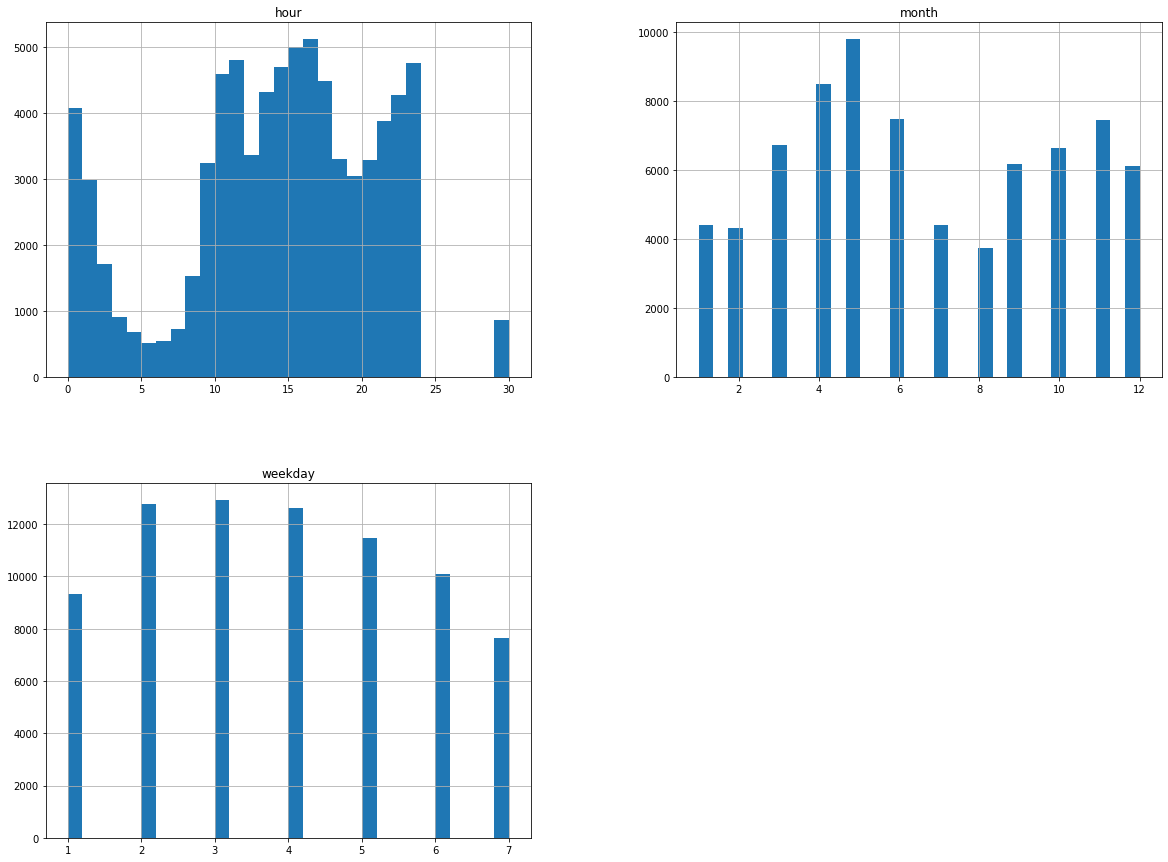

In [19]:
data01.hist(bins=30, figsize=(20,15))

In [20]:
data01.corr()

,month,weekday,hour
month,1.000000,-0.034363,-0.003802
weekday,-0.034363,1.000000,-0.055173
hour,-0.003802,-0.055173,1.000000


## 2. 데이터의 문제 수정하기

### 2.1. NULL값이 존재하는 변수 중 범주형 변수의 NULL값을 'UNKNOWN'으로 대체하고 처리 결과를 제시하세요.

In [9]:
data01['major'].fillna('unknown', inplace=True)
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76806 entries, 0 to 76805
Data columns (total 9 columns):
user_id            76806 non-null object
region             76806 non-null object
college            76806 non-null object
major              76806 non-null object
social_position    76806 non-null object
month              75772 non-null float64
weekday            76806 non-null int64
hour               76806 non-null int64
DB                 76805 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 5.3+ MB


In [11]:
data01['DB'] = data01['DB'].fillna('unknown')
data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76806 entries, 0 to 76805
Data columns (total 9 columns):
user_id            76806 non-null object
region             76806 non-null object
college            76806 non-null object
major              76806 non-null object
social_position    76806 non-null object
month              75772 non-null float64
weekday            76806 non-null int64
hour               76806 non-null int64
DB                 76806 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 5.3+ MB


### 2.2. NULL값이 존재하는 변수 중 수치형 변수의 NULL값은 제거하고 처리 뒤 데이터의 행과 열을 제시하세요.

In [15]:
data01 = data01.dropna(subset=['month'])
data01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75772 entries, 0 to 76805
Data columns (total 9 columns):
user_id            75772 non-null object
region             75772 non-null object
college            75772 non-null object
major              75772 non-null object
social_position    75772 non-null object
month              75772 non-null float64
weekday            75772 non-null int64
hour               75772 non-null int64
DB                 75772 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 5.8+ MB


In [16]:
data01.isnull().sum()

user_id            0
region             0
college            0
major              0
social_position    0
month              0
weekday            0
hour               0
DB                 0
dtype: int64

In [17]:
data01.to_csv('output.csv', index=False)